<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Auto_model_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from scipy import stats

In [2]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(filepath, header=0)

In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
#create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [ ]:
#create predictor(X) and target(Y) variable:
X = df[['highway-mpg']]
Y = df[['price']]

In [ ]:
#Fit the linear model (aka compute the a and b, of Yhat= a + bX):
lm.fit(X,Y)

LinearRegression()

In [ ]:
#make a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [ ]:
#value of the intercept a:
lm.intercept_

array([38423.30585816])

In [ ]:
# value of the slope b:
lm.coef_

array([[-821.73337832]])

Thus the final linear model is:
$$
\hat{Y} = a + bX => Price = 38423.31 - 821.73 * highway-mpg
$$

In [ ]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [ ]:
X = df[['engine-size']]
Y = df[['price']]

In [ ]:
lm1.fit(X, Y)
lm1

LinearRegression()

In [ ]:
lm1.intercept_

array([-7963.33890628])

In [ ]:
lm1.coef_

array([[166.86001569]])

Thus the final linear model is:
$$
\hat{Y} = a + bX => price = -7963.34 + 166.86 * engine-size
$$

In [ ]:
Yhat1 = lm1.predict(X)
Yhat1[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [ ]:
df[['engine-size','price']].head()

,engine-size,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [5]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df[['price']]

In [ ]:
lm3 = LinearRegression()

In [ ]:
lm3.fit(Z, Y)

LinearRegression()

In [ ]:
lm3.intercept_

array([-15806.62462633])

In [ ]:
lm3.coef_

array([[53.49574423,  4.70770099, 81.53026382, 36.05748882]])

$$
\hat{Y} = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4 =>
$$
$$
price = -15806.62 + 53.50 * horsepower + 4.71 * curb-weight + 81.53 * engine-size + 36.06 * highway-mpg
$$

In [ ]:
Yhat3 = lm3.predict(Z)
Yhat3[0:5]

array([[13699.11161184],
       [13699.11161184],
       [19051.65470233],
       [10620.36193015],
       [15521.31420211]])

In [ ]:
#Yhat3[0:5].ravel().tolist()
#df['price'][0:5]
Dict = {'Y':Yhat[0:5].ravel().tolist(), 'Y1':Yhat1[0:5].ravel().tolist(), 'Y3':Yhat3[0:5].ravel().tolist(), 'Price':df['price'].head()}
print(pd.DataFrame(Dict))

              Y            Y1            Y3    Price
0  16236.504643  13728.463134  13699.111612  13495.0
1  16236.504643  13728.463134  13699.111612  16500.0
2  17058.238022  17399.383479  19051.654702  16500.0
3  13771.304508  10224.402804  10620.361930  13950.0
4  20345.171535  14729.623228  15521.314202  17450.0


In [ ]:
lm2 = LinearRegression()
lm2

LinearRegression()

In [ ]:
W = df[['highway-mpg', 'normalized-losses']]
Y = df[['price']]

In [ ]:
lm2.fit(W,Y)

LinearRegression()

In [ ]:
lm2.coef_

array([[-820.45434016,    1.49789586]])

In [ ]:
lm2.intercept_

array([38201.31327246])

$$
\hat{Y} = a + b_1  X_1 + b_2  X_2
$$
$$
price = 38201.31 -820.45 * highway-mpg + 1.50 * normalized-losses
$$

In [ ]:
Yhat2 = lm2.predict(W)
Yhat2[0:5]

array([[16231.78938339],
       [16231.78938339],
       [17052.24372355],
       [13833.33798916],
       [20396.97271047]])

In [ ]:
Dict = {'Y':Yhat[0:5].ravel().tolist(), 'Y1':Yhat1[0:5].ravel().tolist(), 'Y2':Yhat2[0:5].ravel().tolist(),\
        'Y3':Yhat3[0:5].ravel().tolist(), 'Price':df['price'].head()}
print(pd.DataFrame(Dict))

              Y            Y1            Y2            Y3    Price
0  16236.504643  13728.463134  16231.789383  13699.111612  13495.0
1  16236.504643  13728.463134  16231.789383  13699.111612  16500.0
2  17058.238022  17399.383479  17052.243724  19051.654702  16500.0
3  13771.304508  10224.402804  13833.337989  10620.361930  13950.0
4  20345.171535  14729.623228  20396.972710  15521.314202  17450.0


In [ ]:
lm4 = LinearRegression()
C = df[['normalized-losses', 'city-L/100km', 'wheel-base', 'horsepower', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'highway-mpg']]
Y = df[['price']]
lm4.fit(C, Y)
print("The coefficients are:", lm4.coef_ ,"and the intercept is:", lm4.intercept_)

The coefficients are: [[-3.90801656e+00  1.41336790e+03  1.10411162e+02  2.79446131e+01
  -1.36295483e+04  3.80123287e+04  3.17806290e+00  7.50264263e+01
  -3.29551801e+02  3.63494239e+02]] and the intercept is: [-65243.33291565]


In [ ]:
Yhat4 = lm4.predict(C)
Yhat4[0:5]

array([[12288.31332764],
       [12288.31332764],
       [18809.56752785],
       [10666.70911175],
       [16369.96643624]])

In [ ]:
Dict = {'Y':Yhat[0:5].ravel().tolist(), 'Y1':Yhat1[0:5].ravel().tolist(), 'Y2':Yhat2[0:5].ravel().tolist(),\
        'Y3':Yhat3[0:5].ravel().tolist(), 'Y4':Yhat4[0:5].ravel().tolist(), 'Price':df['price'].head()}
print(pd.DataFrame(Dict))

              Y            Y1            Y2            Y3            Y4  \
0  16236.504643  13728.463134  16231.789383  13699.111612  12288.313328   
1  16236.504643  13728.463134  16231.789383  13699.111612  12288.313328   
2  17058.238022  17399.383479  17052.243724  19051.654702  18809.567528   
3  13771.304508  10224.402804  13833.337989  10620.361930  10666.709112   
4  20345.171535  14729.623228  20396.972710  15521.314202  16369.966436   

     Price  
0  13495.0  
1  16500.0  
2  16500.0  
3  13950.0  
4  17450.0  


The scatter-regression plot for highway-mpg is:


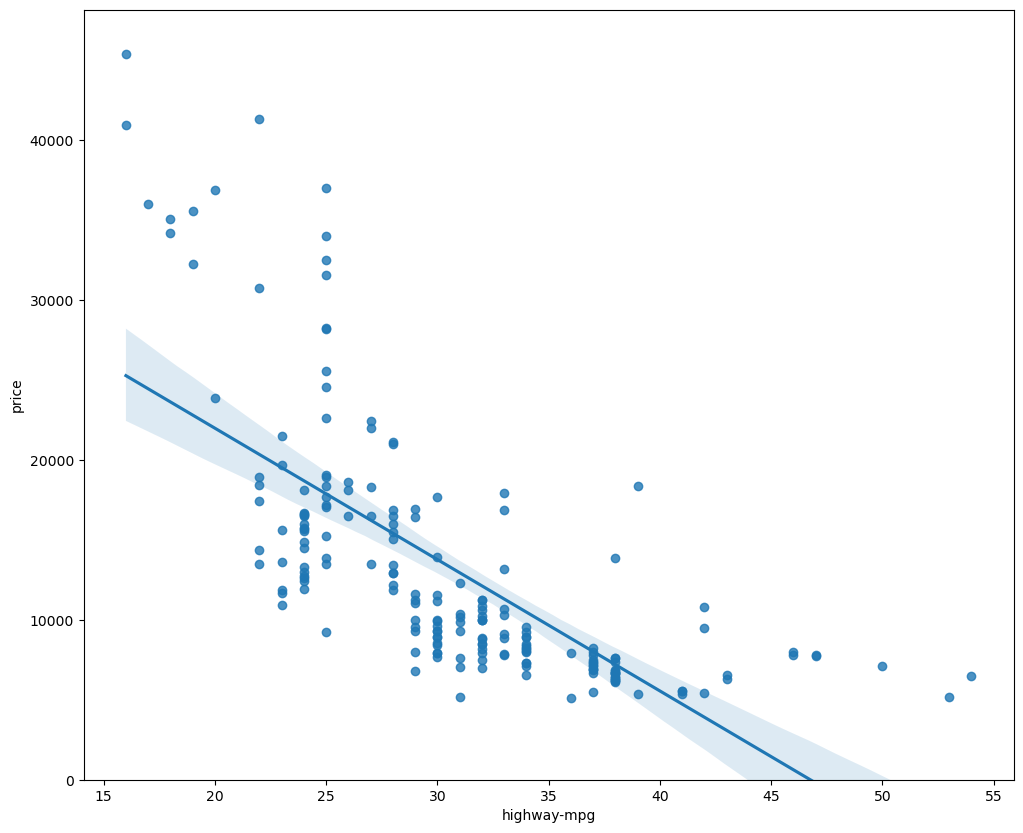

For highway-mpg the Pearson Correlation Coefficient is -0.7046922650589533  with a P-value of P = 1.7495471144474792e-31


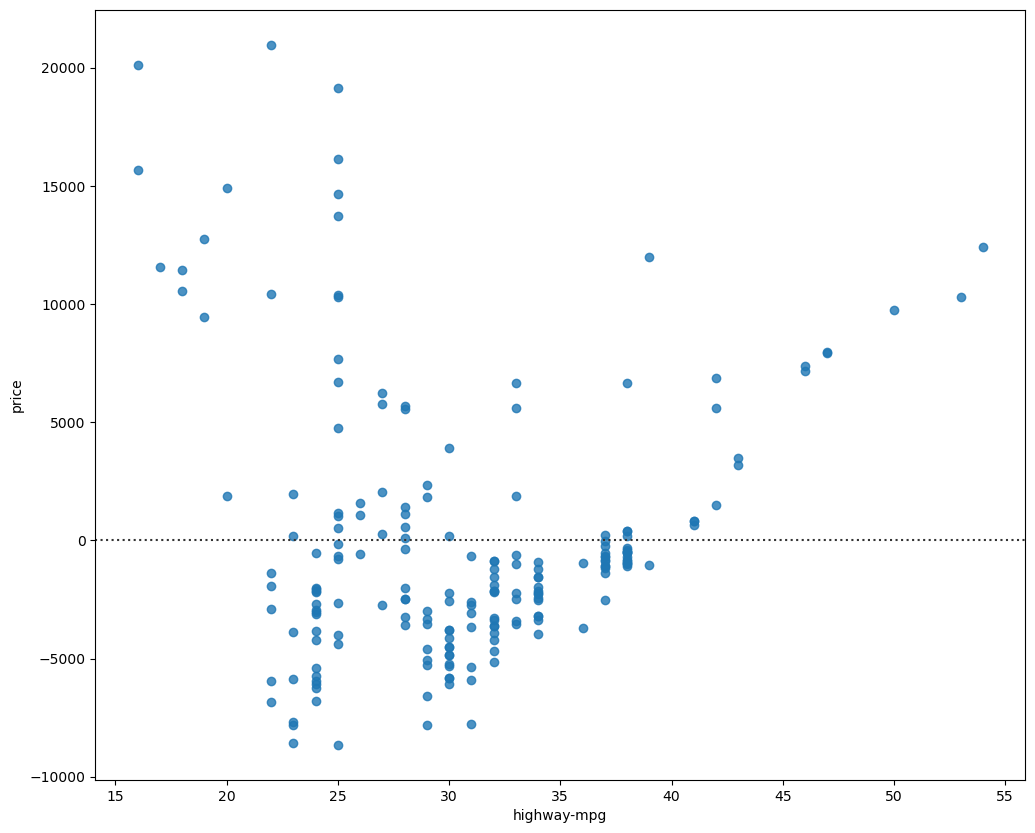

The scatter-regression plot for peak-rpm is:


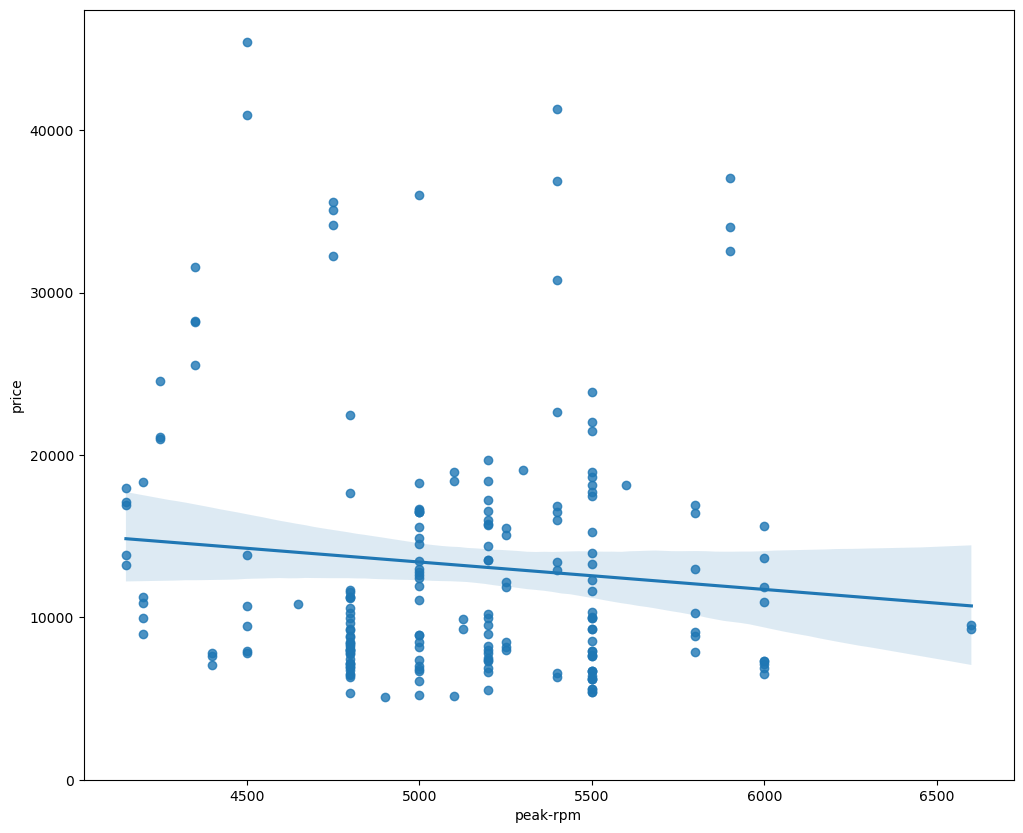

For peak-rpm the Pearson Correlation Coefficient is -0.10161587407588141  with a P-value of P = 0.15117691651445295


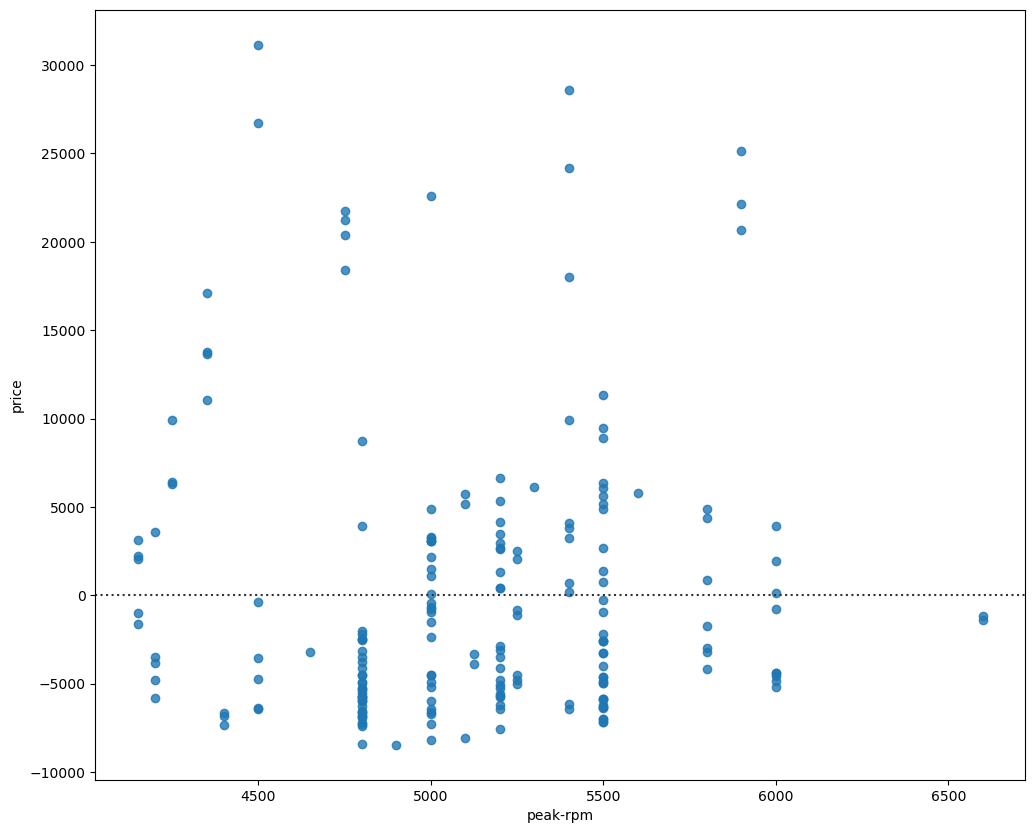

In [ ]:
for param in ["highway-mpg", "peak-rpm"]:
    print(f"The scatter-regression plot for {param} is:")
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    sns.regplot(x=param, y="price", data=df)
    plt.ylim(0,)
    plt.show()
    pearson_coef, p_value = stats.pearsonr(df[param], df['price'])
    print(f"For {param} the Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)
    plt.figure(figsize=(width, height))
    sns.residplot(x=df[param], y=df['price'])
    plt.show()

In [ ]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


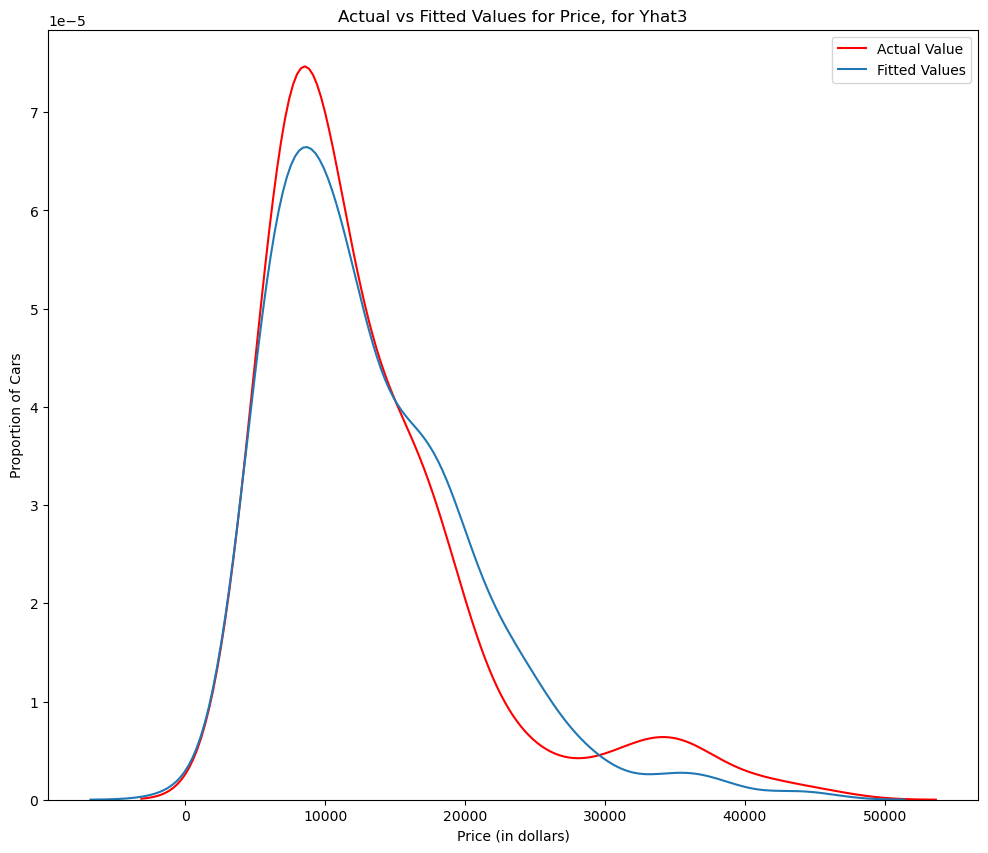

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(Yhat3, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price, for Yhat3')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend()

plt.show()
plt.close()

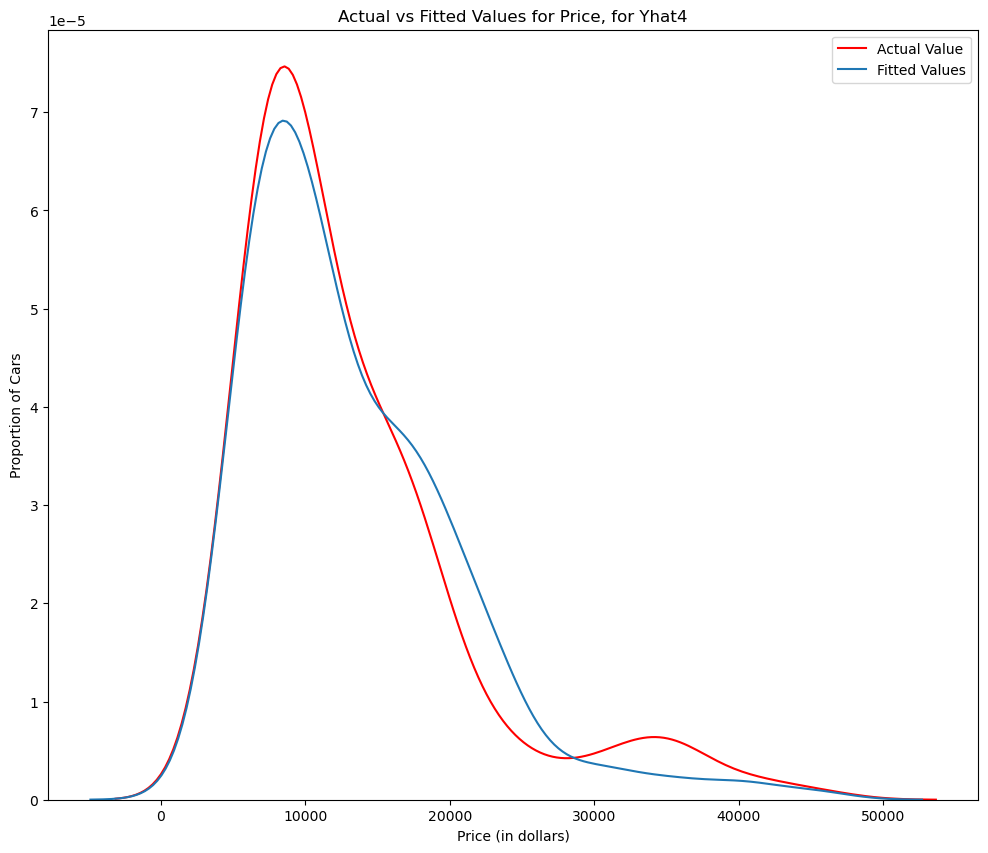

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(Yhat4, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price, for Yhat4')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend()

plt.show()
plt.close()

In [ ]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [7]:
x = df['highway-mpg']
y = df['price']

In [ ]:
# Here we use a polynomial of the 3rd order (cubic)
#First we make the fit that produces the coefficients "f"
f = np.polyfit(x, y, 3)
print(f)
#then we produce the polynomial function "p", using the coefficients "f"
p = np.poly1d(f)
print(p)

[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]
        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


That is, the polynomial function of 3rd degree is:
$$
p(x) = -1.557 x^3 + 204.8 x^2 - 8965 x + 1.379*10^5
$$

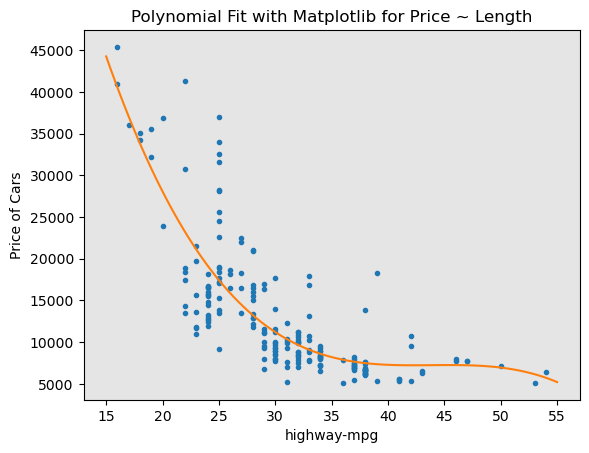

In [ ]:
PlotPolly(p, x, y, 'highway-mpg')

In [ ]:
# Here we use a polynomial of the 11rd order (cubic)
f1 = np.polyfit(x, y, 11)
print(f)
p1 = np.poly1d(f1)
print(p1)

[-1.55663829e+00  2.04754306e+02 -8.96543312e+03  1.37923594e+05]
            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


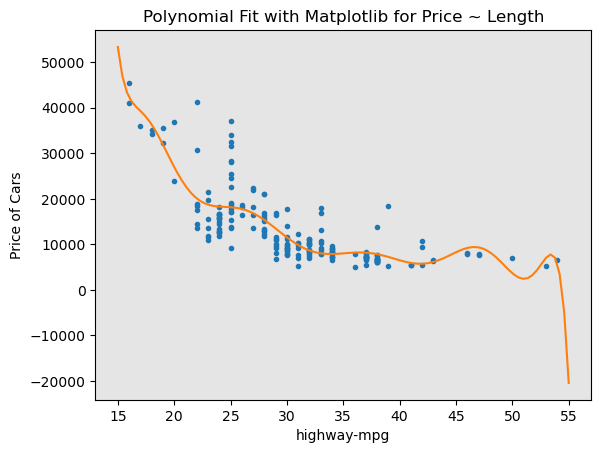

In [ ]:
PlotPolly(p1, x, y, 'highway-mpg')

for Multivariate Polynomial functions like:
$$
\hat{Y} = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$
 we create a PolynomialFeatures object of degree 2:

In [ ]:
#PolynomialFeatures is transforming the original input (linear) features into a new set of (polynomial) features
#that include not only the original features but also their polynomial combinations up to a specified degree (2).
#e.g. for 3 features a, b, c and degree=2: [a, b, c]->[1, a, b, c, a^2, b^2, c^2, ab, bc, ca]
#The formula for calculating the number of the polynomial features is N(n,d)=C(n+d,d)
#where n is the number of the features, d is the degree of the polynomial, C is binomial coefficient(combination).
#In our case the number is C(3+2,2)=5!/(5-2)!2!=10
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [ ]:
Z_pr = pr.fit_transform(Z)

In [ ]:
#In the original data, there are 201 samples and 4 features of up to 1st degree.
Z.shape

(201, 4)

In [ ]:
#After the transformation, there are 201 samples and 15 features of 2nd degree C(4+2,2).
Z_pr.shape

(201, 15)

In [ ]:
model = LinearRegression()
model.fit(Z_pr, y)  # y is your dependent variable

LinearRegression()

In [ ]:
model.coef_

array([ 0.00000000e+00,  3.79990747e+02,  9.53081616e+00, -1.06265103e+02,
        1.82168928e+02,  1.69423474e+00, -1.86864385e-01, -1.29043091e+00,
       -2.14860065e+00,  7.57100954e-04,  1.11910005e-01, -1.92007463e-01,
        8.95252693e-02,  4.23869258e-02,  4.66019878e+00])

In [ ]:
model.intercept_

-21262.848278772464

In [ ]:
Yhat5 = model.predict(Z_pr)
Yhat5[0:5]

array([13102.74784197, 13102.74784197, 18225.54572197, 10390.29636543,
       16136.29619174])

In [ ]:
Dict = {'Y':Yhat[0:5].ravel().tolist(), 'Y1':Yhat1[0:5].ravel().tolist(), 'Y2':Yhat2[0:5].ravel().tolist(),\
        'Y3':Yhat3[0:5].ravel().tolist(), 'Y4':Yhat4[0:5].ravel().tolist(), 'Y5':Yhat5[0:5].ravel().tolist(),\
        'Price':df['price'].head()}
print(pd.DataFrame(Dict))

              Y            Y1            Y2            Y3            Y4  \
0  16236.504643  13728.463134  16231.789383  13699.111612  12288.313328   
1  16236.504643  13728.463134  16231.789383  13699.111612  12288.313328   
2  17058.238022  17399.383479  17052.243724  19051.654702  18809.567528   
3  13771.304508  10224.402804  13833.337989  10620.361930  10666.709112   
4  20345.171535  14729.623228  20396.972710  15521.314202  16369.966436   

             Y5    Price  
0  13102.747842  13495.0  
1  13102.747842  16500.0  
2  18225.545722  16500.0  
3  10390.296365  13950.0  
4  16136.296192  17450.0  


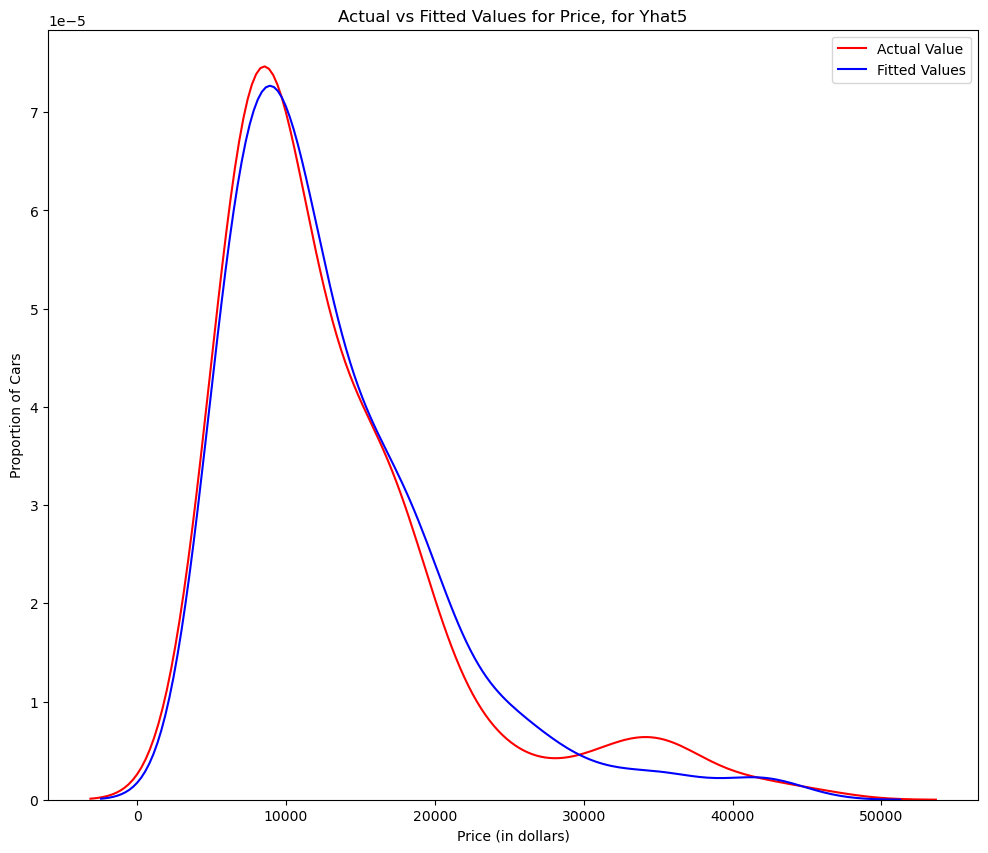

In [ ]:
plt.figure(figsize=(width, height))


ax1 = sns.kdeplot(df['price'], color="r", label="Actual Value")
sns.kdeplot(Yhat5, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price, for Yhat5')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.legend()

plt.show()
plt.close()

In [3]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [4]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data (with StandardScaler), perform a transform (with PolynomialFeatures)
and fit the model (with LinearRegression) simultaneously.


In [8]:
Z = Z.astype(float)
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [9]:
ypipe=pipe.predict(Z)
ypipe[0:5]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [ ]:
Dict = {'Y':Yhat[0:5].ravel().tolist(), 'Y1':Yhat1[0:5].ravel().tolist(), 'Y2':Yhat2[0:5].ravel().tolist(),\
        'Y3':Yhat3[0:5].ravel().tolist(), 'Y4':Yhat4[0:5].ravel().tolist(), 'Y5':Yhat5[0:5].ravel().tolist(),\
        'Y6':ypipe[0:5].ravel().tolist(), 'Price':df['price'].head()}
print(pd.DataFrame(Dict))

              Y            Y1            Y2            Y3            Y4  \
0  16236.504643  13728.463134  16231.789383  13699.111612  12288.313328   
1  16236.504643  13728.463134  16231.789383  13699.111612  12288.313328   
2  17058.238022  17399.383479  17052.243724  19051.654702  18809.567528   
3  13771.304508  10224.402804  13833.337989  10620.361930  10666.709112   
4  20345.171535  14729.623228  20396.972710  15521.314202  16369.966436   

             Y5            Y6    Price  
0  13102.747842  13102.747842  13495.0  
1  13102.747842  13102.747842  16500.0  
2  18225.545722  18225.545722  16500.0  
3  10390.296365  10390.296366  13950.0  
4  16136.296192  16136.296192  17450.0  


In [ ]:
Input = [('scale', StandardScaler()), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(Z, y)
ypipe = pipe.predict(Z)
ypipe[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [ ]:
print("The R-squared for lm model is:", lm.score(X,Y))

The R-squared for lm model is: 0.4965911884339175


In [ ]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of the observed price and it\'s predicted value is:' , mse)

The mean square error of the observed price and it's predicted value is: 31635042.944639895


In [ ]:
print("The R-squared for lm3 model is:", lm3.score(Z,Y))
mse3 = mean_squared_error(df['price'], Yhat3)
print('The mean square error of the observed price and it\'s predicted value is:' , mse3)

The R-squared for lm3 model is: 0.8093562806577458
The mean square error of the observed price and it's predicted value is: 11980366.870726489


In [ ]:
print("The R-squared for lm2 model is:", lm2.score(W,Y))
mse2 = mean_squared_error(df['price'], Yhat2)
print('The mean square error of the observed price and it\'s predicted value is:' , mse2)

The R-squared for lm2 model is: 0.4966263556974878
The mean square error of the observed price and it's predicted value is: 31632832.975589428


In [ ]:
print("The R-squared for lm4 model is:", lm4.score(C,Y))
mse4 = mean_squared_error(df['price'], Yhat4)
print('The mean square error of the observed price and it\'s predicted value is:' , mse4)

The R-squared for lm4 model is: 0.8334171963929906
The mean square error of the observed price and it's predicted value is: 10468339.10108163


$$
R^2 = 1 - \frac{\text{SS}_{res}}{\text{SS}_{tot}}
$$

In [ ]:
r_squared = r2_score(y, p(x))
print('The R-square value for p(x) is: ', r_squared)
print('The mean square error of the observed price and it\'s predicted value is:', mean_squared_error(y, p(x)))

The R-square value for p(x) is:  0.6741946663906516
The mean square error of the observed price and it's predicted value is: 20474146.42636123


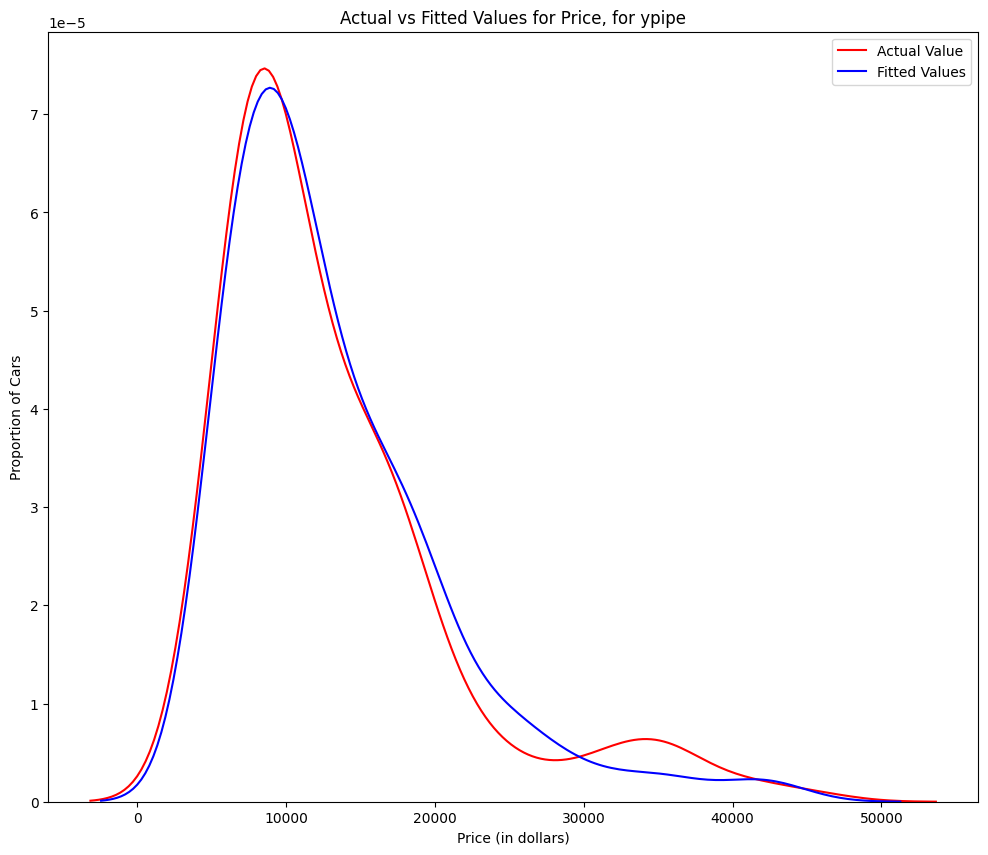

In [12]:
width = 12
height = 10

plt.figure(figsize=(width,height))

ax3 = sns.kdeplot(df['price'], color='r', label="Actual Value")
sns.kdeplot(ypipe, color='b', label="Fitted Values", ax=ax3)

plt.title("Actual vs Fitted Values for Price, for ypipe")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.legend()

plt.show()
plt.close()

In [13]:
mse_pipe = mean_squared_error(Y, ypipe)
r2_score_pipe = r2_score(Y, ypipe)
print('MSE for multi-variable polynomial pipeline ypipe is:', mse_pipe)
print('R^2 for multi-variable polynomial pipeline ypipe is:', r2_score_pipe)

MSE for multi-variable polynomial pipeline ypipe is: 9656613.4039896
R^2 for multi-variable polynomial pipeline ypipe is: 0.8463341969864728


In [14]:
Input2=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=3, include_bias=False)), ('model',LinearRegression())]
pipe2 = Pipeline(Input2)
Z = Z.astype(float)
pipe2.fit(Z, Y)
ypipe2 = pipe2.predict(Z)

In [15]:
mse_pipe2 = mean_squared_error(Y, ypipe2)
r2_score_pipe2 = r2_score(Y, ypipe2)
print('MSE for multi-variable polynomial pipeline ypipe2 is:', mse_pipe2)
print('R^2 for multi-variable polynomial pipeline ypipe2 is:', r2_score_pipe2)

MSE for multi-variable polynomial pipeline ypipe2 is: 6578339.082604683
R^2 for multi-variable polynomial pipeline ypipe2 is: 0.8953188125760443


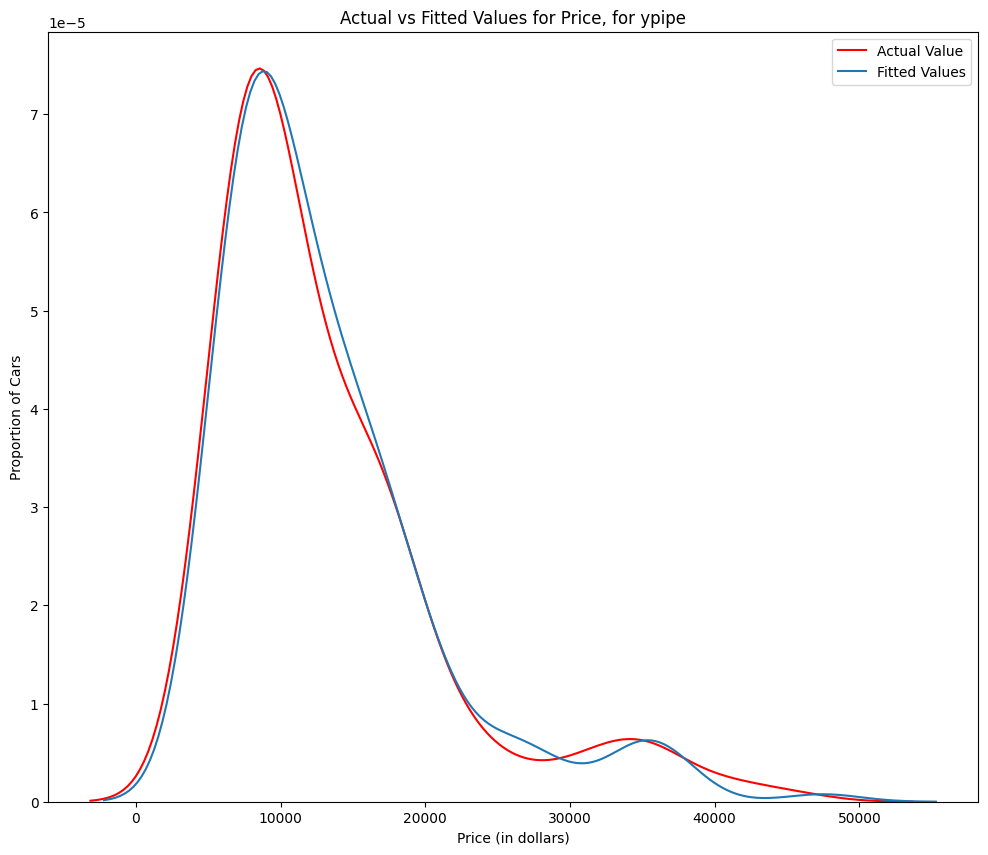

In [16]:
plt.figure(figsize=(width,height))

ax4 = sns.kdeplot(df['price'], color='r', label="Actual Value")
sns.kdeplot(ypipe2, color='b', label="Fitted Values", ax=ax4)

plt.title("Actual vs Fitted Values for Price, for ypipe")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.legend()

plt.show()
plt.close()

In [17]:
Input3=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=4, include_bias=False)), ('model',LinearRegression())]
pipe3 = Pipeline(Input3)
Z = Z.astype(float)
pipe3.fit(Z, Y)
ypipe3 = pipe3.predict(Z)

In [18]:
mse_pipe3 = mean_squared_error(Y, ypipe3)
r2_score_pipe3 = r2_score(Y, ypipe3)
print('MSE for multi-variable polynomial pipeline ypipe3 is:', mse_pipe3)
print('R^2 for multi-variable polynomial pipeline ypipe3 is:', r2_score_pipe3)

MSE for multi-variable polynomial pipeline ypipe3 is: 2505778.0245633093
R^2 for multi-variable polynomial pipeline ypipe3 is: 0.9601255247352982


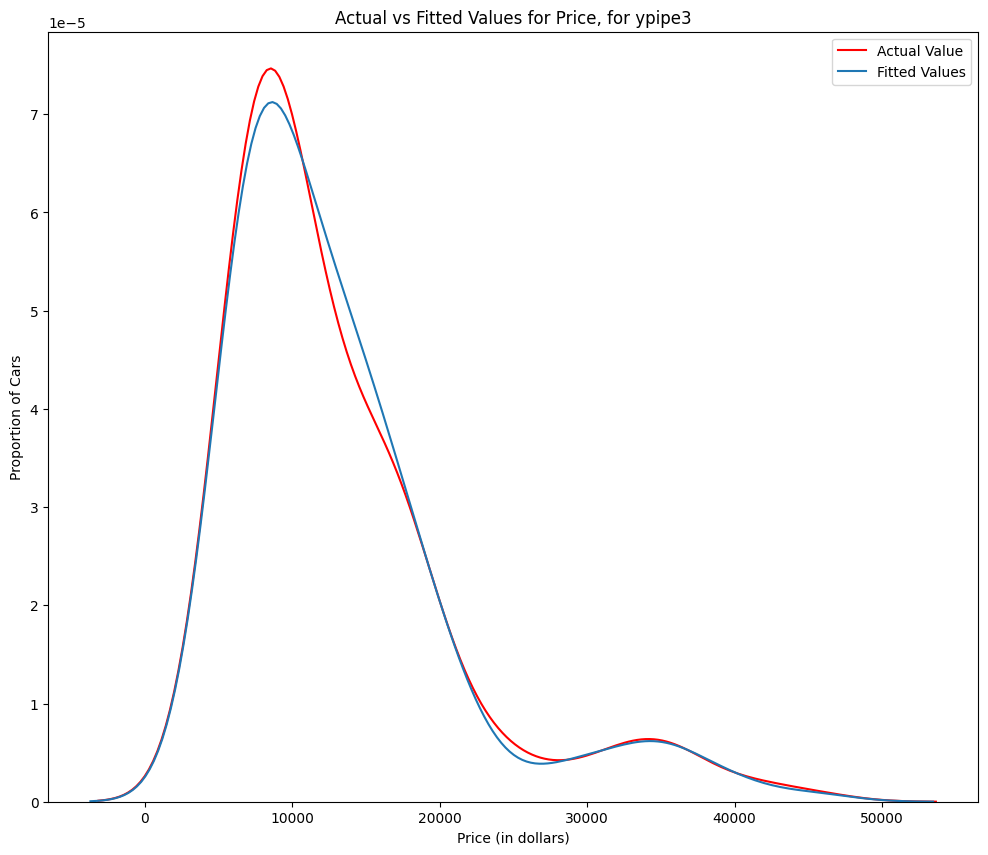

In [19]:
plt.figure(figsize=(width,height))

ax5 = sns.kdeplot(df['price'], color='r', label="Actual Value")
sns.kdeplot(ypipe3, color='b', label="Fitted Values", ax=ax5)

plt.title("Actual vs Fitted Values for Price, for ypipe3")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.legend()

plt.show()
plt.close()

In [20]:
Input4=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=5, include_bias=False)), ('model',LinearRegression())]
pipe4 = Pipeline(Input4)
Z = Z.astype(float)
pipe4.fit(Z, Y)
ypipe4 = pipe4.predict(Z)

In [21]:
mse_pipe4 = mean_squared_error(Y, ypipe4)
r2_score_pipe4 = r2_score(Y, ypipe4)
print('MSE for multi-variable polynomial pipeline ypipe4 is:', mse_pipe4)
print('R^2 for multi-variable polynomial pipeline ypipe4 is:', r2_score_pipe4)

MSE for multi-variable polynomial pipeline ypipe4 is: 440638.67421474843
R^2 for multi-variable polynomial pipeline ypipe4 is: 0.9929881115791536


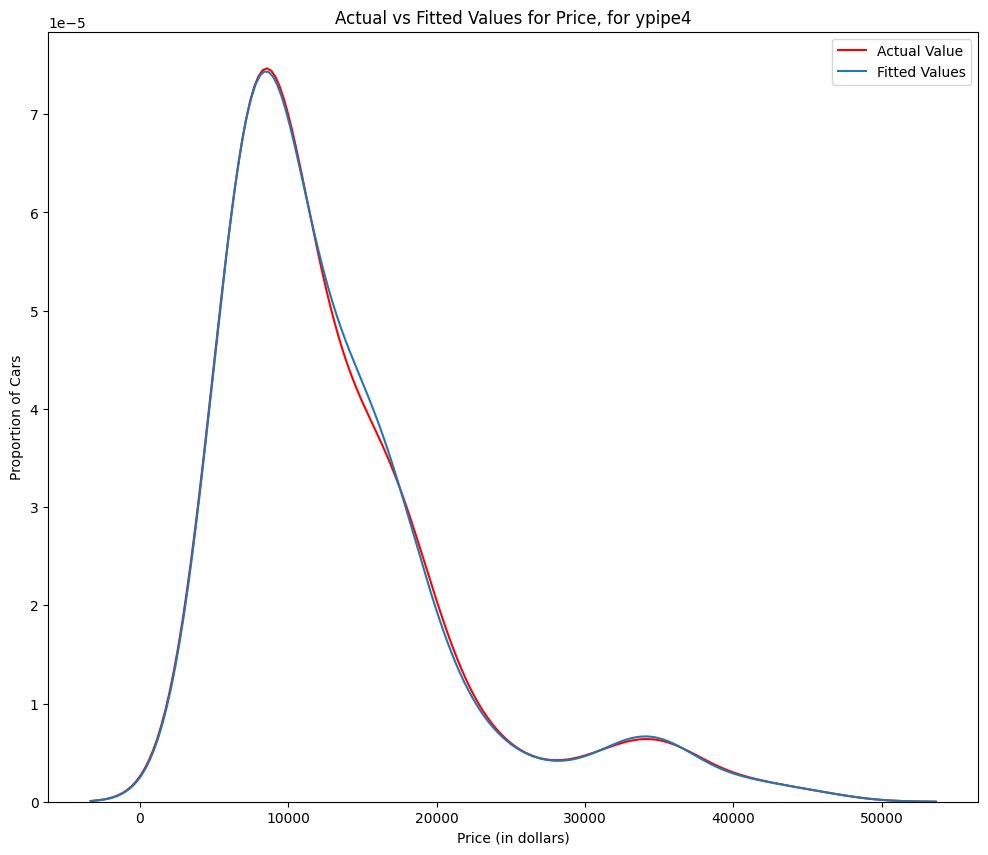

In [22]:
plt.figure(figsize=(width,height))

ax6 = sns.kdeplot(df['price'], color='r', label="Actual Value")
sns.kdeplot(ypipe4, color='b', label="Fitted Values", ax=ax6)

plt.title("Actual vs Fitted Values for Price, for ypipe4")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.legend()

plt.show()
plt.close()

In [23]:
Input5=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=6, include_bias=False)), ('model',LinearRegression())]
pipe5 = Pipeline(Input5)
Z = Z.astype(float)
pipe5.fit(Z, Y)
ypipe5 = pipe5.predict(Z)

In [24]:
mse_pipe5 = mean_squared_error(Y, ypipe5)
r2_score_pipe5 = r2_score(Y, ypipe5)
print('MSE for multi-variable polynomial pipeline ypipe5 is:', mse_pipe5)
print('R^2 for multi-variable polynomial pipeline ypipe5 is:', r2_score_pipe5)

MSE for multi-variable polynomial pipeline ypipe5 is: 81601.89905668424
R^2 for multi-variable polynomial pipeline ypipe5 is: 0.9987014680176807


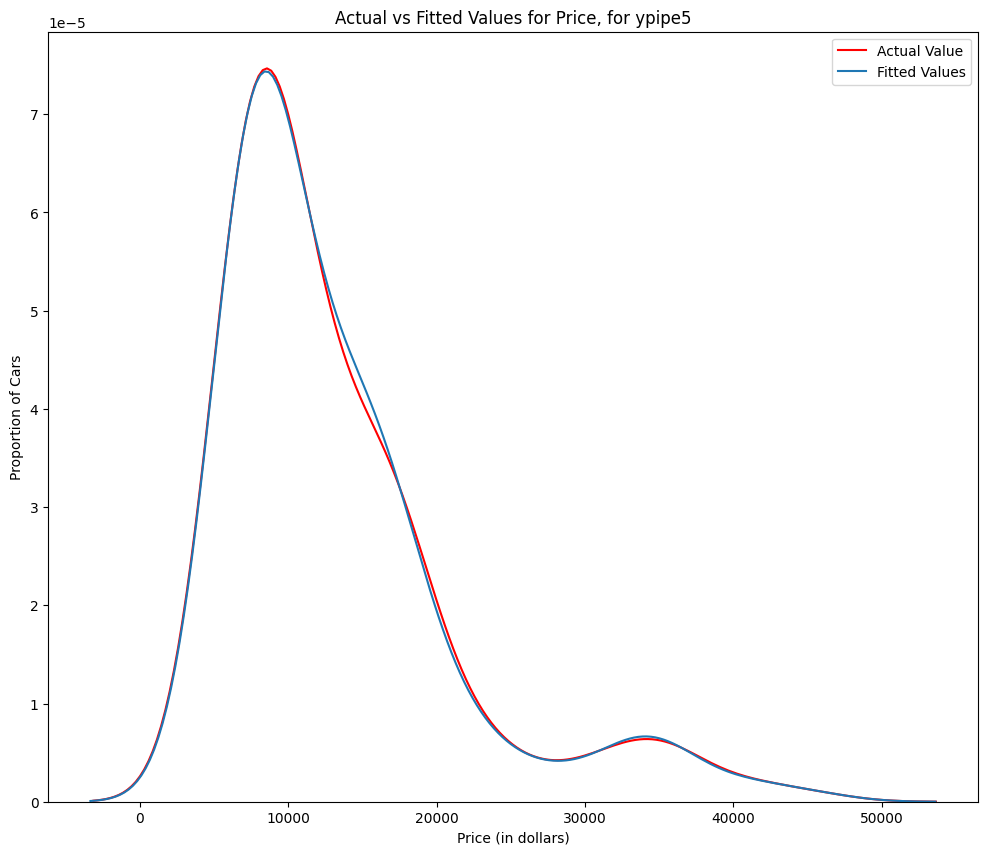

In [25]:
plt.figure(figsize=(width,height))

ax7 = sns.kdeplot(df['price'], color='r', label="Actual Value")
sns.kdeplot(ypipe4, color='b', label="Fitted Values", ax=ax7)

plt.title("Actual vs Fitted Values for Price, for ypipe5")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.legend()

plt.show()
plt.close()